In [1]:
import numpy as np
import pandas as pd
Final_1=pd.read_csv(r"C:\Users\agrabia\Documents\Formation\Projet/Final_1_corrt.csv")

In [2]:
Final_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346812 entries, 0 to 346811
Data columns (total 22 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   IncidentNumber                        346812 non-null  object 
 1   CalYear                               346812 non-null  int64  
 2   HourOfCall                            346812 non-null  int64  
 3   IncidentGroup                         346812 non-null  int64  
 4   TravelTimeSeconds                     346812 non-null  float64
 5   DateOfCall_bis                        346812 non-null  object 
 6   MinuteOfCall                          346812 non-null  int64  
 7   DelayCodeId_bis                       346812 non-null  float64
 8   Joursem                               346812 non-null  int64  
 9   mois                                  346812 non-null  int64  
 10  jour                                  346812 non-null  int64  
 11  

In [3]:
Final_1['DateOfCall_bis'] = pd.to_datetime(Final_1['DateOfCall_bis'])
Final_1=Final_1.dropna()
Final_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 346811 entries, 0 to 346811
Data columns (total 22 columns):
 #   Column                                Non-Null Count   Dtype         
---  ------                                --------------   -----         
 0   IncidentNumber                        346811 non-null  object        
 1   CalYear                               346811 non-null  int64         
 2   HourOfCall                            346811 non-null  int64         
 3   IncidentGroup                         346811 non-null  int64         
 4   TravelTimeSeconds                     346811 non-null  float64       
 5   DateOfCall_bis                        346811 non-null  datetime64[ns]
 6   MinuteOfCall                          346811 non-null  int64         
 7   DelayCodeId_bis                       346811 non-null  float64       
 8   Joursem                               346811 non-null  int64         
 9   mois                                  346811 non-null  int6

In [4]:
from sklearn import linear_model,preprocessing
from sklearn.model_selection import train_test_split

In [5]:
data=Final_1.drop(['TravelTimeSeconds','IncidentNumber','DateOfCall_bis','DelayCodeId_bis'], axis=1)
target=Final_1['TravelTimeSeconds']

In [6]:
X_train,X_test,y_train,y_test=train_test_split(data,target,test_size=0.2,random_state=66)

In [7]:
X_train_scaled=preprocessing.scale(X_train)
scaler=preprocessing.StandardScaler().fit(X_train)
X_train_scaled=scaler.transform(X_train)
scaler=preprocessing.StandardScaler().fit(X_test)
X_test_scaled=scaler.transform(X_test)

In [8]:
from sklearn import neighbors,model_selection,ensemble,svm

In [9]:
knn=neighbors.KNeighborsRegressor()
parametres={'n_neighbors':range(2,40)}
grid_knn=model_selection.GridSearchCV(estimator=knn,param_grid=parametres)
grid_knn.fit(X_train_scaled,y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(2, 40)})

In [10]:
print('Meilleurs paramètres:',grid_knn.best_params_)
print(grid_knn.score(X_test_scaled,y_test))
y_pred=grid_knn.predict(X_test_scaled)

Meilleurs paramètres: {'n_neighbors': 39}
0.06572744225934057


In [11]:
rf=ensemble.RandomForestRegressor()
grid_rf=model_selection.GridSearchCV(estimator=rf, param_grid={'max_features':["squrt","log2",None]})
grid_rf.fit(X_train_scaled,y_train)
grid_rf.best_params_
print(grid_rf.score(X_test_scaled,y_test))
y_pred_rf=grid_rf.predict(X_test_scaled)


C:\ProgramData\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
5 fits failed out of a total of 15.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 340, in fit
    self._validate_params()
  File "C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py", line 581, in _validate_params
    validate_parameter_constraints(
  File "C:\ProgramData\anaconda3\lib\site-packages\

0.34738632374341694


In [12]:
residus=abs(y_pred_rf-y_test)
residus.describe()

count    69363.000000
mean        69.703309
std         77.063889
min          0.000000
25%         24.130000
50%         50.030000
75%         87.100000
max       1002.530000
Name: TravelTimeSeconds, dtype: float64

In [13]:
y_test.describe()

count    69363.000000
mean       240.660165
std        128.627196
min          0.000000
25%        158.000000
50%        221.000000
75%        299.000000
max       1173.000000
Name: TravelTimeSeconds, dtype: float64

In [14]:
erreur=residus/y_test
erreur.describe()

count    6.936300e+04
mean              inf
std               NaN
min      0.000000e+00
25%      1.029477e-01
50%      2.246114e-01
75%      4.273602e-01
max               inf
Name: TravelTimeSeconds, dtype: float64

In [15]:
len(residus[residus<50])/len(residus)

0.49961795193402825

In [16]:
len(residus[residus<100])/len(residus)

0.804261638049104

In [17]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import f1_score

In [18]:
dtc=DecisionTreeRegressor()
ac=AdaBoostRegressor(base_estimator=dtc,n_estimators=400)
ac.fit(X_train_scaled,y_train)
ac.score(X_test_scaled,y_test)
y_pred_ac=ac.predict(X_test_scaled)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [19]:
ac.score(X_test_scaled,y_test)

0.38486518893932153

In [ ]:
svm_clf=svm.SVR()
svm_clf.fit(X_train_scaled,y_train)
print(svm_clf.score(X_test_scaled,y_test))
y_pred_svm=svm_clf.predict(X_test_scaled)

0.07657038683430972


In [23]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error
ridge_reg=RidgeCV(alphas=(0.001,0.01,0.1,0.3,0.7,1,10,50,100))
ridge_reg.fit(X_train_scaled,y_train)
print('alpha',ridge_reg.alpha_)
print('R² train', ridge_reg.score(X_train_scaled,y_train))
print('R² test',ridge_reg.score(X_test_scaled,y_test))
ridge_pred_train=ridge_reg.predict(X_train_scaled)
ridge_pred_test=ridge_reg.predict(X_test_scaled)
print('erreur quadatrique train',mean_squared_error(y_train,ridge_pred_train))
print('erreur quadatrique test',mean_squared_error(y_test,ridge_pred_test))
ridge_reg.score(X_test_scaled,y_test)

alpha 50.0
R² train 0.07085341057430083
R² test 0.07305781574689618
erreur quadatrique train 15212.982056407045
erreur quadatrique test 15335.996195747502


0.07305781574689618

alpha [ 5.44195726  0.          6.65556197 -0.         -0.          3.55290132
 -0.         -0.89573582  0.         -0.25010704  0.92042073 15.17671446
 16.98820991 -0.         -0.         -0.          0.79057399  0.        ]


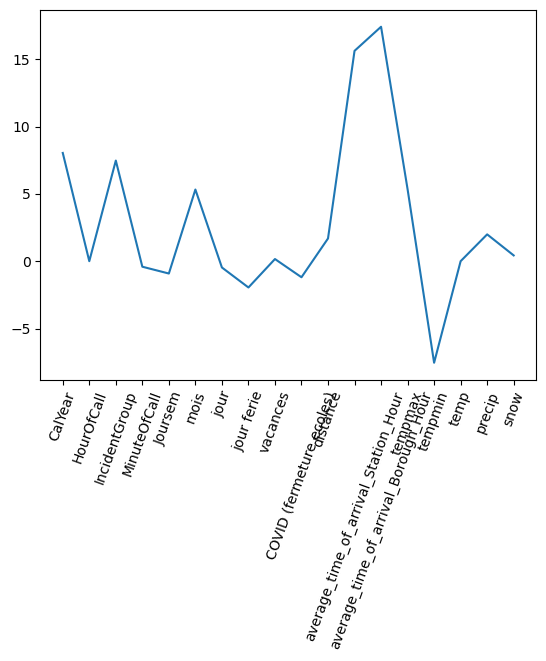

In [24]:
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt
lasso_r=Lasso(alpha=1)
lasso_r.fit(X_train_scaled,y_train)
print('alpha',lasso_r.coef_)
lasso_reg=Lasso(alpha=0.1)
lasso_reg.fit(X_train_scaled,y_train)
coef=lasso_reg.coef_
plt.plot(range(len(data.columns)),coef)
plt.xticks(range(len(data.columns)),data.columns.values,rotation=70);

In [25]:
data.columns.values,lasso_r.coef_

(array(['CalYear', 'HourOfCall', 'IncidentGroup', 'MinuteOfCall',
        'Joursem', 'mois', 'jour', 'jour ferie', 'vacances',
        'COVID (fermeture ecoles)', 'distance',
        'average_time_of_arrival_Station_Hour',
        'average_time_of_arrival_Borough_Hour', 'tempmax', 'tempmin',
        'temp', 'precip', 'snow'], dtype=object),
 array([ 5.44195726,  0.        ,  6.65556197, -0.        , -0.        ,
         3.55290132, -0.        , -0.89573582,  0.        , -0.25010704,
         0.92042073, 15.17671446, 16.98820991, -0.        , -0.        ,
        -0.        ,  0.79057399,  0.        ]))

In [26]:
print('R² train', lasso_reg.score(X_train_scaled,y_train))
print('R² test',lasso_reg.score(X_test_scaled,y_test))
lasso_pred_train=lasso_reg.predict(X_train_scaled)
lasso_pred_test=lasso_reg.predict(X_test_scaled)
print('erreur quadatrique train',mean_squared_error(y_train,lasso_pred_train))
print('erreur quadatrique test',mean_squared_error(y_test,lasso_pred_test))
lasso_reg.score(X_test_scaled,y_test)

R² train 0.07075448021322206
R² test 0.07286991374489626
erreur quadatrique train 15214.601850124262
erreur quadatrique test 15339.104981210932


0.07286991374489626

In [27]:
from sklearn.linear_model import lasso_path
mes_alphas=(0.001,0.01,0.02,0.025,0.05,0.1,0.25,0.5,0.8,1.0)
alpha_path,coefs_lasso,_=lasso_path(X_train_scaled,y_train,alphas=mes_alphas)
coefs_lasso.shape

C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 124055941.91605759, tolerance: 2048969.9980000001
  model = cd_fast.enet_coordinate_descent_gram(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3511390652.7524204, tolerance: 2048969.9980000001
  model = cd_fast.enet_coordinate_descent_gram(


(18, 10)

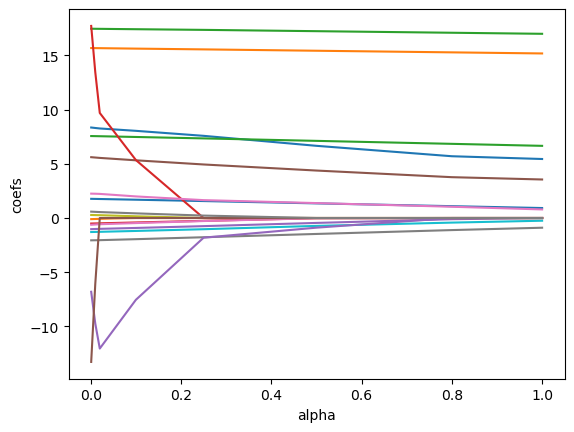

In [28]:
for i in range(coefs_lasso.shape[0]):
    plt.plot(alpha_path,coefs_lasso[i,:])
plt.xlabel('alpha')
plt.ylabel('coefs');

In [29]:
from sklearn.linear_model import LassoCV
model_lasso=LassoCV(cv=10)
model_lasso.fit(X_train_scaled,y_train)
alphas=model_lasso.alphas_
lasso_pred_test=model_lasso.predict(X_test_scaled)
print('score',model_lasso.score(X_test_scaled,y_test))
print('MSE',mean_squared_error(lasso_pred_test,y_test))

score 0.07300263623189085
MSE 15336.909125212342
